# Capston project

### We have project about HR analytics. Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.
## Problem Statemets-
### We have data about employees of organization and we have to identify how salary varies with respect to other considerate variables.
### We have to find which variables in our data are important for predicting salary. We have to analyize data, clean data, normalize the data and after this we have to perform some ML models to predict salary with respect to other cosiderate variables and predict best model for this data.

In [1]:
#Importing important liabraries for analysis of given dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from pandas import read_csv

In [2]:
# Imoprting dataset for analysis
df=pd.read_csv("C:/Users/Lenovo/Downloads/New_data_Set.csv")
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


### In this dataset we have to identify how salary is varying with respect to other considerable factors, thats basically means salary is our target variables. We have to predict Salary with respect to other variables. So Salary is our dependent variable and all others are our indepedent variables.

### Now in this dataset we have to see which columns are effecting to salary and predict the salary according to that column. 

# Analysis of dataset

### At first we have to see all information about data for our model building

In [3]:
# finding total number of columns and rows
df.shape

(5000, 20)

In [4]:
# getting list of column names
df.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

In [5]:
# Total columns
len(df.columns)

20

In [6]:
# checking is their any duplicates present in our dataset
df.duplicated().any()

False

### From data we can see their are some blank spaces so first we have to fill it before performing any operation.

In [7]:
df=df.replace(r'^\s*$', np.NaN, regex=True)
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,NaN,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,NaN,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,NaN,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,NaN,72,PG


### We can see here 5000 rows and 20 columns in our data. We also get columns name.

### Now from each column we can classify categorical and numerical variables
### Catogrical Variable - Gender, Buisnesss, Dependancies, Calls,Type, Billing, Rating, Education.(Total 8 columns)
### Numerical Variable - Age, Salary, base_pay, Bonus, Unit_Price, Volume, openingbalance, closingbalance, low,Unit_Sales, Total_Sales, Months. (Total12 Columns)

### Now we varify data type for each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   o

### from above we can see datatype for each column was correct but for Total_Sales it was object it should be float since it was numerical variable, so we have to change it.

In [9]:
df["Total_Sales"]=df["Total_Sales"].astype("float64")

In [10]:
# again we verify data type for Total_Sales
df["Total_Sales"].dtype

dtype('float64')

In [11]:
# we use describe() function to see total count, mean,standard deviation, min, max and quantile ranges for respective columns
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,8684.800000,72.00000


# We see our target variable is normally distributed or not

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

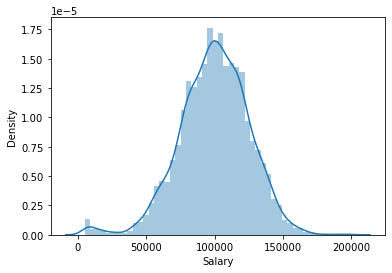

In [12]:
sns.distplot(df['Salary'])

### Now it has some outliers but not very large in number.

# Handeling null values

In [13]:
# checking null values
df.isnull().any()

Gender            False
Business          False
Dependancies      False
Calls             False
Type              False
Billing           False
Rating            False
Age               False
Salary            False
Base_pay           True
Bonus             False
Unit_Price        False
Volume            False
openingbalance     True
closingbalance    False
low               False
Unit_Sales        False
Total_Sales        True
Months            False
Education         False
dtype: bool

In [14]:
# counting null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

### Here we can see openingbalance has high null values which are 1476. Base_pay has 23 null values and Total_Sales has 16 null values.

### From above correlation function we can visualise null values for each column in our dataset.        We can see that in "opening balance" column has major null values which is about 30% to 40% . Also in "Base pay" and "Total Sales" columns also null values but it was less.

### Now we have to clean our data. Since we see in our analysis of data that our data has null values . Their is "openingbalance" ,"Base_pay" and "Total_Sales" columns has null values , so we fill null values with the help of fillna() function.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openingbalance'>

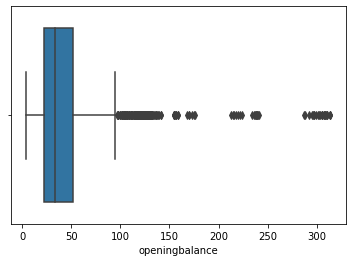

In [15]:
# For openingbalance
# first we have to see outliers.
sns.boxplot(df["openingbalance"])

### Here in "openingbalance" we see their are many ourliers so we use median value to fill the null value in this column.

In [16]:
df["openingbalance"].fillna(df["openingbalance"].median(),inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Base_pay'>

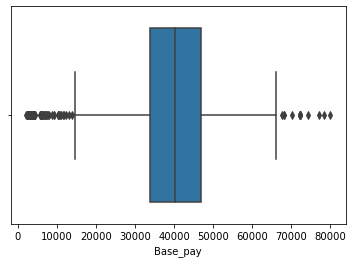

In [17]:
# For Base_pay
# we have to check outliers
sns.boxplot(df["Base_pay"])

### Here for "Base_Pay" we use median value for fill null values of column.

In [18]:
df["Base_pay"].fillna(df["Base_pay"].median(),inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Sales'>

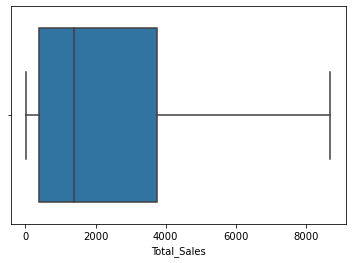

In [19]:
sns.boxplot(df["Total_Sales"])

### For "Total_Sales" column we use mode for filling null values since this column has some scaled data 

In [20]:
df["Total_Sales"].fillna(df["Total_Sales"].mode()[0],inplace=True)

### Now we check is our null values filled or not

In [21]:
df.isnull().any()

Gender            False
Business          False
Dependancies      False
Calls             False
Type              False
Billing           False
Rating            False
Age               False
Salary            False
Base_pay          False
Bonus             False
Unit_Price        False
Volume            False
openingbalance    False
closingbalance    False
low               False
Unit_Sales        False
Total_Sales       False
Months            False
Education         False
dtype: bool

### So now their is not any null values present in our dataset

In [22]:
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.850000,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.230000,4.290000,3.720000,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.260000,4.310000,3.830000,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.790000,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,33.119999,293.838840,310.955001,117.80,19.45,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,33.119999,301.311314,309.610028,118.60,19.45,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,33.119999,306.040009,303.483494,118.60,19.45,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,33.119999,308.579987,312.432438,118.65,19.45,72,PG


# Feature selection

# Analysis of numerical variables and target variable of dataset

### Now we see spearman correlation between columns since we dont know if our data is normally distribuited or not.It doesnt work for columns which are dtype object since it was categorical variables, but here Business column is category but it is in form of int 0 & 1 so we exclude it and then perform corr() funtion.

In [23]:
df1=df.drop(['Business'],axis=1)

In [24]:
df1.corr(method="spearman")*100

,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Age,100.000000,20.228180,19.253057,20.228180,12.826637,-3.934477,7.813692,44.098882,20.203950,20.226808,19.192259,22.283665
Salary,20.228180,100.000000,99.374354,100.000000,81.171311,-39.048779,17.198060,34.649833,99.985870,99.999741,98.831794,60.379576
Base_pay,19.253057,99.374354,100.000000,99.374354,80.816836,-39.000805,16.302190,33.959458,99.359657,99.374009,98.209566,59.719169
Bonus,20.228180,100.000000,99.374354,100.000000,81.171311,-39.048779,17.198060,34.649833,99.985870,99.999741,98.831794,60.379576
Unit_Price,12.826637,81.171311,80.816836,81.171311,100.000000,-32.422983,9.725756,26.369923,81.241207,81.173482,80.033149,55.006199
Volume,-3.934477,-39.048779,-39.000805,-39.048779,-32.422983,100.000000,-0.831111,-14.710785,-39.220924,-39.050546,-39.069994,-26.207721
openingbalance,7.813692,17.198060,16.302190,17.198060,9.725756,-0.831111,100.000000,25.314964,17.192930,17.197391,17.240158,-5.324627
closingbalance,44.098882,34.649833,33.959458,34.649833,26.369923,-14.710785,25.314964,100.000000,34.627752,34.648512,33.647340,36.592681
low,20.203950,99.985870,99.359657,99.985870,81.241207,-39.220924,17.192930,34.627752,100.000000,99.985599,98.817249,60.375227
Unit_Sales,20.226808,99.999741,99.374009,99.999741,81.173482,-39.050546,17.197391,34.648512,99.985599,100.000000,98.831491,60.377897


<AxesSubplot:>

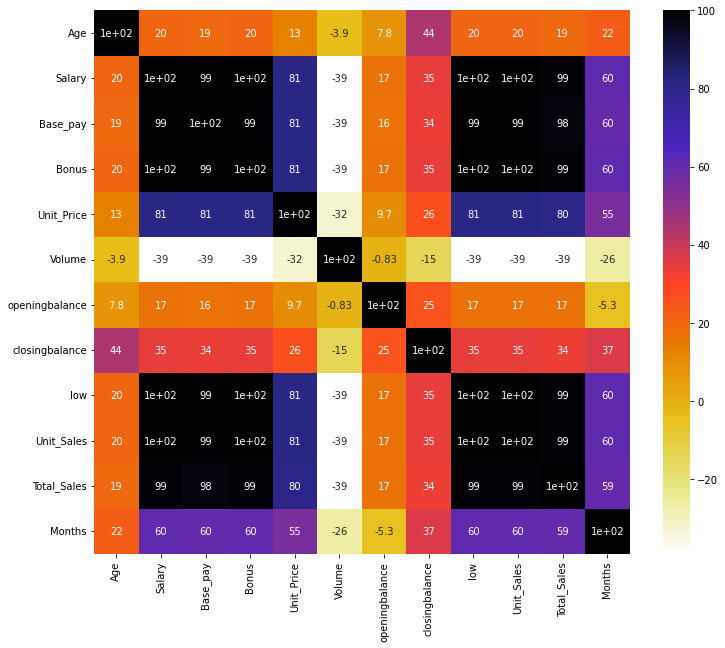

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(method="spearman")*100,annot=True,cmap=plt.cm.CMRmap_r)

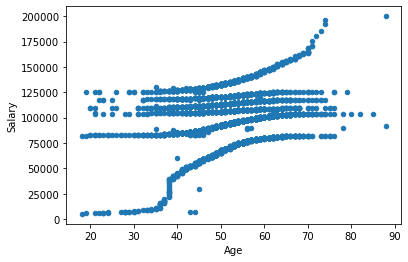

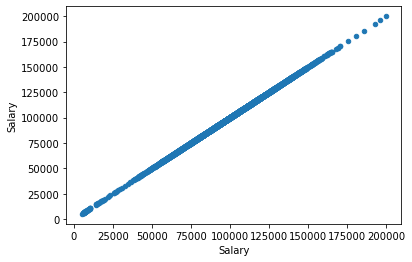

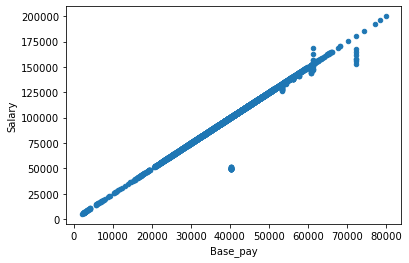

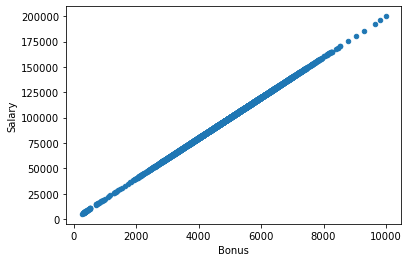

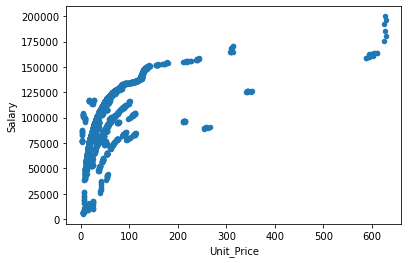

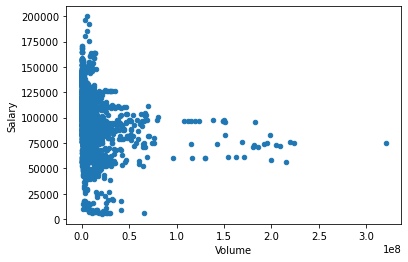

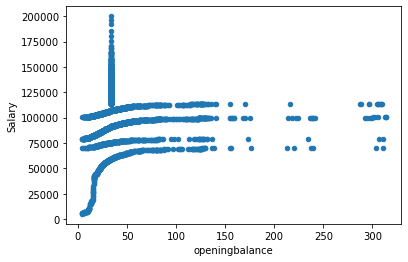

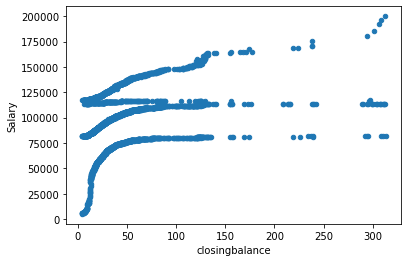

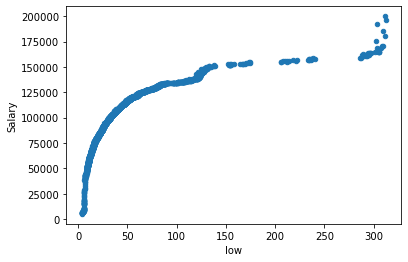

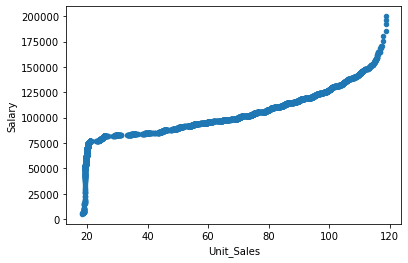

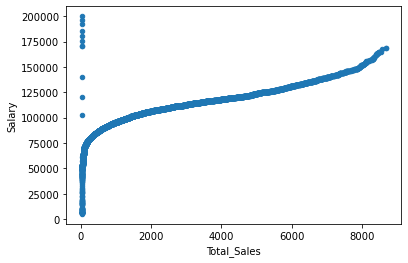

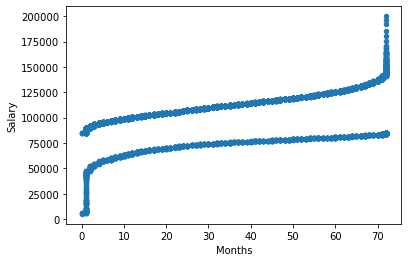

In [26]:
# plotting scatter plot between all numerical variables with respect to salary
for n in range (7, 19):
    df.plot(kind='scatter', x=n, y='Salary')

### Now from above line plot we can see for all ages salary are prity same so it was little diflection but it doesn't effect our target variable, so we can remove this column.  

### Now in above lineplot we see months column effecting salary not in high percentage but it effecting salary so we cannot ignore this column also in corr() we see it has 60% correlation with salary so it was important column.

### From above heatmap we can visalise the correlation between variables of dataset.Here we can see "Salary" and "Bonus" has 100% correlation which is obviously right since compony gives Bonus according to Salary of their employee.Also Here we can see "Salary" and "Base pay" has highcorrelation 99% also "Base pay" and "Bonus" also has 99% correlation. It was obvious since if Base pay of employee is high then present Salary if employee is as compaired to it . Also base pay of employee is high then their compony will give Bonus according to it. "Unit sales" and "Salary" has 94% correlation ."Low" and "Salary" has  81% correlation which is high .        "Buisness" and "Salary" has -0.83% correlation which is very less and negative so it doesn't related.
### So basically we can see that columns "Base_pay", "Bonus", "Unit_Price", "low", "Unit_Sales", "Total_Sales" are highly correlated to our target variable "Salary". 
### And this also high correrelated with each other so it create multicolinearity in our model to handle this we can exclude some variables in this bonus is 100% releted to salary so we keep it but we see if we exclude others so what can heppened to our dataset regression model. 
### Now for volume column after seeing corr() it has-39% correlation with salary and also we plot scatter plot so from scatter plot we see it didnt effect much salary only 0 to 0.5 work lod has high salary but it also has different variation and after that salary is constant for increasing workload so workload is not effect our target variable so we can remove this column.
### For opening and closing balance we can say same thing it doesn't effect salary with the help of correlation and scatter plot, hence we remove it
### From this analysis we can remove "Age","Base_pay", "Unit_Price", "low", Unit_Sales", "Total_Sales", "Volume", "openingbalance", "closingbalance" from our numerical variables.

# Now we see relation between "Salary" and Catagorical variables  in our dataset

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

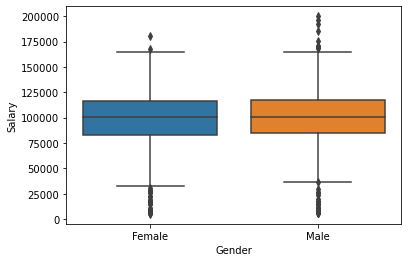

In [27]:
# for "Gender" column
sns.boxplot(x=df["Gender"],y=df["Salary"])

### Now from above dataset we see their are many outliers in our data . But median of males and females are apprximately equal so it says that salary doesn't differentiate in terms of males and females. So Gender column doesn't effect our salary column hence we can exclude this column in our dataset.

<AxesSubplot:xlabel='Business', ylabel='Salary'>

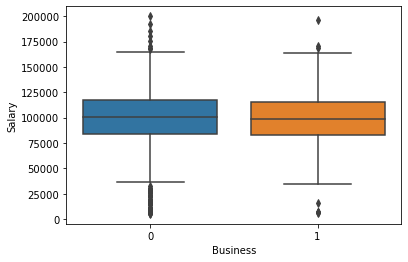

In [28]:
# for "Business" column
sns.boxplot(x=df["Business"],y=df["Salary"])

### From above boxplot we see their are outliers. But we also analyse that median of if the person has a business or no is same for salary. Hence we can exclude this column since it doesn't effect our target variable.

<AxesSubplot:xlabel='Dependancies', ylabel='Salary'>

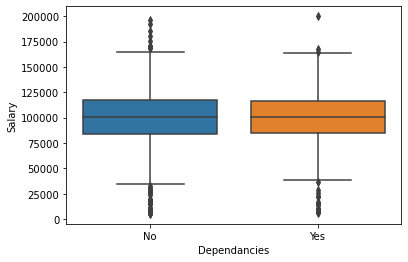

In [29]:
# for "Dependencies" column
sns.boxplot(x=df["Dependancies"],y=df["Salary"])

### From above boxplot we see their are outliers. But we also analyse that median of if the people dependant on the person or not is same for salary. Hence we can exclude this column since it doesn't effect our target variable.

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

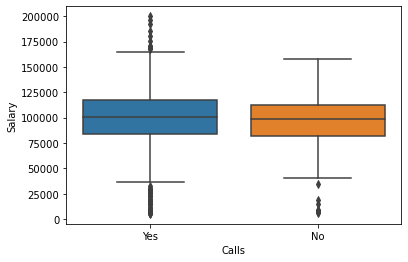

In [30]:
# for "Calls" column
sns.boxplot(x=df["Calls"],y=df["Salary"])

### From above boxplot we see their are outliers. But we also analyse that median of if the person has a authority to take a call is same for salary. Hence we can exclude this column since it doesn't effect our target variable.

<AxesSubplot:xlabel='Type', ylabel='Salary'>

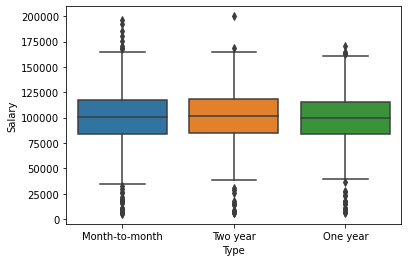

In [31]:
# for "Type" column
sns.boxplot(x=df["Type"],y=df["Salary"])


### From above boxplot we see their are outliers. But we also analyse that median of salary settlement type is same for salary. Hence we can exclude this column since it doesn't effect our target variable.

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

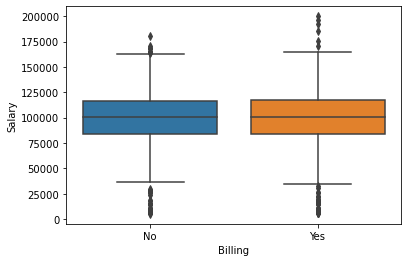

In [32]:
# for "Billing" column
sns.boxplot(x=df["Billing"],y=df["Salary"])

### From above boxplot we see their are outliers. But we also analyse that median of  Subscribed to billing plans or no is same for salary. Hence we can exclude this column since it doesn't effect our target variable.

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

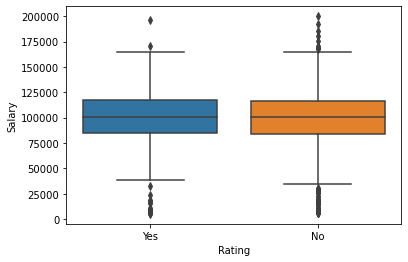

In [33]:
# for "Rating" column
sns.boxplot(x=df["Rating"],y=df["Salary"])

### From above boxplot we see their are outliers. But we also analyse that median of  If he has been given a rating by a superior or no is same for salary. Hence we can exclude this column since it doesn't effect our target variable.

<AxesSubplot:xlabel='Education', ylabel='Salary'>

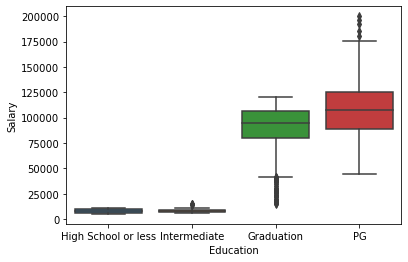

In [34]:
# for "Education" column
sns.boxplot(x=df["Education"],y=df["Salary"])

### Now in this column we can see education type is highly effect salary so we cannot exclude it from our data for performing model. "Education" and "Salary" are highly related, for "high school or less" and "intermediate" education has low salary as compaired to "Graduation" and "PG" . "PG" has highest salary as compaired to others.

### So from above analysis we can conclude that we can drop all categorical columns since it doesn't effect our target variables except "Education" column.

## Now we are only keeping important columns who are effecting our target variable and drop all other columns which we deciding from our feature selection.

In [35]:
# recall columns of our dataset
df.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

In [36]:
df.drop(["Gender","Business","Dependancies","Calls","Type","Billing","Rating","Age","Base_pay","Unit_Price","Volume","openingbalance","closingbalance","low","Unit_Sales","Total_Sales"],axis=1,inplace=True)
df.head(5)

,Salary,Bonus,Months,Education
0,5089.00,254.4500,0,High School or less
1,5698.12,284.9060,0,High School or less
2,5896.65,294.8325,0,High School or less
3,6125.12,306.2560,0,High School or less
4,6245.00,312.2500,1,High School or less


### Now this was our data which after feature selection

### Now we have to convert categorical columns into dummies. Now as we can see education column is ordinal category since we can order it like first high school or less  then intermediate then graduation and at last PG so I use label encoder for it.

In [37]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
df['Education']=class_le.fit_transform(df['Education'].values)

In [38]:
df

,Salary,Bonus,Months,Education
0,5089.00,254.4500,0,1
1,5698.12,284.9060,0,1
2,5896.65,294.8325,0,1
3,6125.12,306.2560,0,1
4,6245.00,312.2500,1,1
...,...,...,...,...
4995,180696.80,9034.8400,72,3
4996,185685.90,9284.2950,72,3
4997,192636.80,9631.8400,72,3
4998,195970.70,9798.5350,72,3


In [39]:
len(df.columns)

4

# Handeling outliers in dataset

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

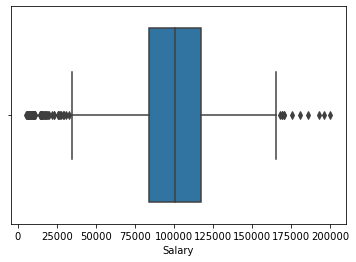

In [40]:
# for Salary column
sns.boxplot(df["Salary"])

### As we can see that their was many outliers in our data so we have to handle it.

In [41]:
# getting upper whisker and lower whisker for outliers detection 
q1=np.quantile(df["Salary"],0.25)
q2=np.quantile(df["Salary"],0.50)
q3=np.quantile(df["Salary"],0.75)
IQR=q3-q1
print("q1=",q1)
print("q2=",q2)
print("q3=",q3)
print("IQR=",IQR)
Upper_whisker=q3+(1.5*IQR)
Lower_whisker=q1-(1.5*IQR)

q1= 83890.33898
q2= 100579.37849999999
q3= 116912.092475
IQR= 33021.753495


In [42]:
# eleminating outliers from Salary column
df["Salary"]=df["Salary"][(df["Salary"]>=Lower_whisker) &(df["Salary"]<=Upper_whisker)]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

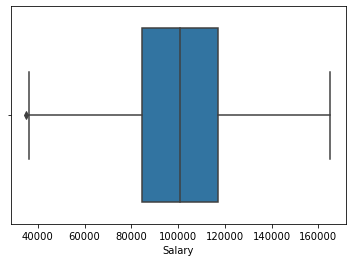

In [43]:
#vewing Salary column after eliminating outliers
sns.boxplot(df["Salary"])

In [44]:
df["Salary"].shape

(5000,)

In [45]:
#checking null values since we eliminate outliers so in place of it their was null values
df["Salary"].isnull().sum()

77

In [46]:
# filling place of outliers with mean of salary column
df["Salary"]=df["Salary"].fillna(df["Salary"].mean())

In [47]:
#checkin null values
df["Salary"].isnull().sum()

0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

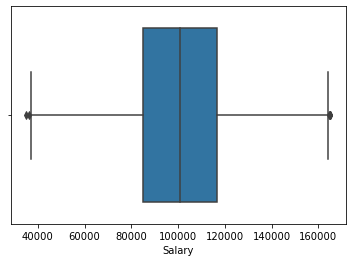

In [48]:
# plotting boxplot after replacing outliers with mean 
sns.boxplot(df["Salary"])

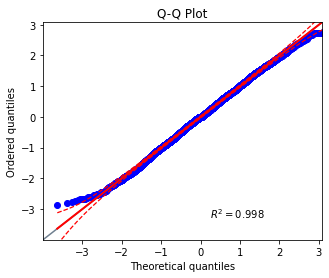

In [49]:
ax= pg.qqplot(df['Salary'],dist='norm')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus'>

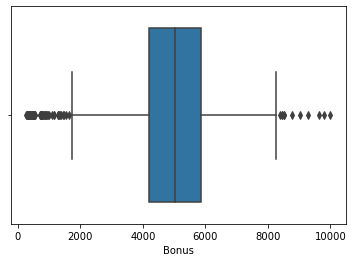

In [50]:
# for Bonus column
sns.boxplot(df["Bonus"])

In [51]:
# getting upper whisker and lower whisker for outliers detection 
q1=np.quantile(df["Bonus"],0.25)
q2=np.quantile(df["Bonus"],0.50)
q3=np.quantile(df["Bonus"],0.75)
IQR=q3-q1
print("q1=",q1)
print("q2=",q2)
print("q3=",q3)
print("IQR=",IQR)
Upper_whisker=q3+(1.5*IQR)
Lower_whisker=q1-(1.5*IQR)

q1= 4194.5169495
q2= 5028.968925
q3= 5845.6046237499995
IQR= 1651.0876742499995


In [52]:
# eleminating outliers from Bonus column
df["Bonus"]=df["Bonus"][(df["Bonus"]>=Lower_whisker) &(df["Bonus"]<=Upper_whisker)]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus'>

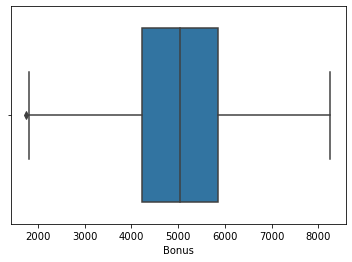

In [53]:
#vewing Bonus column after eliminating outliers
sns.boxplot(df["Bonus"])

In [54]:
#checking null values since we eliminate outliers so in place of it their was null values
df["Bonus"].isnull().sum()

77

In [55]:
#replacing null values with mean of bonus column since after removing outliers their should be mean=median=mode
df["Bonus"]=df["Bonus"].fillna(df["Bonus"].mean())

In [56]:
# checking null values since we filled null values with mean
df["Bonus"].isnull().sum()

0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus'>

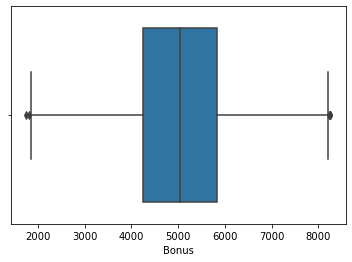

In [57]:
#plotting boxplot after replacing null values with Bonus column
sns.boxplot(df["Bonus"])

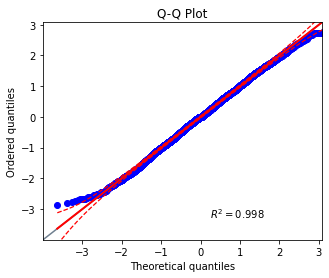

In [58]:
ax= pg.qqplot(df["Bonus"],dist='norm')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months'>

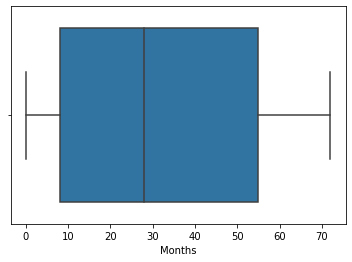

In [59]:
# for months column
sns.boxplot(df["Months"])

## we can see here we do not have any outliers.

In [60]:
df

,Salary,Bonus,Months,Education
0,100799.611045,5039.980552,0,1
1,100799.611045,5039.980552,0,1
2,100799.611045,5039.980552,0,1
3,100799.611045,5039.980552,0,1
4,100799.611045,5039.980552,1,1
...,...,...,...,...
4995,100799.611045,5039.980552,72,3
4996,100799.611045,5039.980552,72,3
4997,100799.611045,5039.980552,72,3
4998,100799.611045,5039.980552,72,3


## Standard Scaler

In [61]:
# if we see our data are not in standard normal form so we convert it into standard normal form with the use of standardization
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
df[["Salary","Bonus","Months","Education"]]=scaling.fit_transform(df[["Salary","Bonus","Months","Education"]])

In [62]:
df.head()

,Salary,Bonus,Months,Education
0,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
1,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
2,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
3,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
4,-1.264628e-15,2.134060e-14,-1.265911,-0.547169


# Model Building

# Train-Test split

### Here our target variable is "Salary" so we get y equal to that column and X equal to remaining dataset.

In [63]:
X=df.drop("Salary",axis=1)
y=df["Salary"]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Now here in our data we use regressor type of model since our target variable is "Salary" which is continuous. first we perform linear regression then Decision tree and at last Random forest . We check different models and compare it.

# 1) Linear Regression

In [66]:
#importing LinearRegression from sklearn 
from sklearn.linear_model import LinearRegression

In [67]:
L=LinearRegression()

In [68]:
# fitting training data to linear regression model
L.fit(X_train,y_train)

LinearRegression()

In [69]:
# using predict to values of X_test 
predictions=L.predict(X_test)
predictions

array([ 0.12923064,  1.69692685,  0.74353417, ...,  0.01209652,
       -0.66124124, -0.5913016 ])

In [70]:
#calculating accuracy for test data
print(L.score(X_test,y_test)*100)

100.0


In [71]:
# calculating rmse and r2 score values 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evolution for training set
prediction1=L.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,prediction1)))
r2=r2_score(y_train,prediction1)*100
print("model performance for training set")
print("rmse is {}".format(rmse))
print("r2 score is {}".format(r2))

# model evolution for testing set
prediction=L.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test,prediction)))
r2=r2_score(y_test,prediction)*100
print("model performance for training set")
print("rmse is {}".format(rmse))
print("r2 score is {}".format(r2))

model performance for training set
rmse is 1.618207067855021e-10
r2 score is 100.0
model performance for training set
rmse is 1.6504713246175415e-10
r2 score is 100.0


### Here my model get 100% accuracy ,but seems to little abrupt. But we visualise that how the model predict the values.

Text(0, 0.5, 'Predicted values')

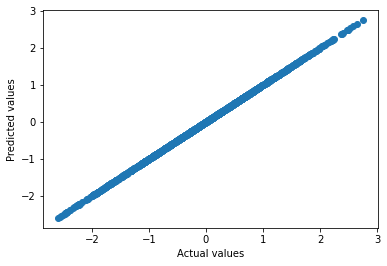

In [72]:
# Plot prediction with scatter plot
plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [73]:
# Add predictions, actuals and independent variables in single dataframe for better comparison.
df2=X_test[["Bonus","Months","Education"]]
df2["Actualvalue_Salary "]=y_test
df2["Predictedvalue_Salary"]=predictions
df2

,Bonus,Months,Education,Actualvalue_Salary,Predictedvalue_Salary
2764,0.129231,-0.575816,0.819046,0.129231,0.129231
4767,1.696927,1.575659,0.819046,1.696927,1.696927
3814,0.743534,0.601406,-1.230277,0.743534,0.743534
3499,0.557397,0.236061,0.819046,0.557397,0.557397
2735,0.113251,-0.575816,-1.230277,0.113251,0.113251
...,...,...,...,...,...
4140,0.958011,0.966751,0.819046,0.958011,0.958011
3969,0.834570,0.804376,-1.230277,0.834570,0.834570
2535,0.012097,-0.738191,0.819046,0.012097,0.012097
1361,-0.661241,-1.265911,0.819046,-0.661241,-0.661241


## Cross validiation

### Now we change change data and check accuracy

In [74]:
from sklearn.model_selection import ShuffleSplit
model=LinearRegression()

In [75]:
ssplit=ShuffleSplit(n_splits=10,test_size=20)

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
results=cross_val_score(model,X,y,cv=ssplit)*100

In [78]:
print(results)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


so accuracy is 100% again.

### So we perform different model to check effeciency of them.

# 2) Decision Tree

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
# Importing important liabraries for decision tree regressor 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [81]:
# calculating accuracy score for our decision tree model
print(dtree.score(X_train,y_train)*100)
print(dtree.score(X_test,y_test)*100)

96.93971454026061
96.96340784434648


In [82]:
# predict the values for testing data
predictions = dtree.predict(X_test)
predictions

array([ 0.2609568 ,  2.03718108,  0.73673265, ..., -0.17015349,
       -0.68635343, -0.68635343])

In [83]:
# getting features for plotting decision tree
features = list(df.columns[1:])
features

['Bonus', 'Months', 'Education']

In [84]:
dt=dtree.fit(X_train,y_train)

[Text(697.5, 713.475, 'Bonus <= 0.029\nmse = 1.004\nsamples = 3500\nvalue = 0.007'),
 Text(348.75, 509.625, 'Bonus <= -0.95\nmse = 0.388\nsamples = 1799\nvalue = -0.768'),
 Text(174.375, 305.775, 'Bonus <= -1.625\nmse = 0.191\nsamples = 601\nvalue = -1.498'),
 Text(87.1875, 101.92499999999995, 'mse = 0.089\nsamples = 202\nvalue = -2.016'),
 Text(261.5625, 101.92499999999995, 'mse = 0.037\nsamples = 399\nvalue = -1.235'),
 Text(523.125, 305.775, 'Bonus <= -0.428\nmse = 0.086\nsamples = 1198\nvalue = -0.402'),
 Text(435.9375, 101.92499999999995, 'mse = 0.023\nsamples = 539\nvalue = -0.686'),
 Text(610.3125, 101.92499999999995, 'mse = 0.017\nsamples = 659\nvalue = -0.17'),
 Text(1046.25, 509.625, 'Bonus <= 1.0\nmse = 0.347\nsamples = 1701\nvalue = 0.828'),
 Text(871.875, 305.775, 'Bonus <= 0.499\nmse = 0.075\nsamples = 1131\nvalue = 0.479'),
 Text(784.6875, 101.92499999999995, 'mse = 0.018\nsamples = 612\nvalue = 0.261'),
 Text(959.0625, 101.92499999999995, 'mse = 0.019\nsamples = 519\nva

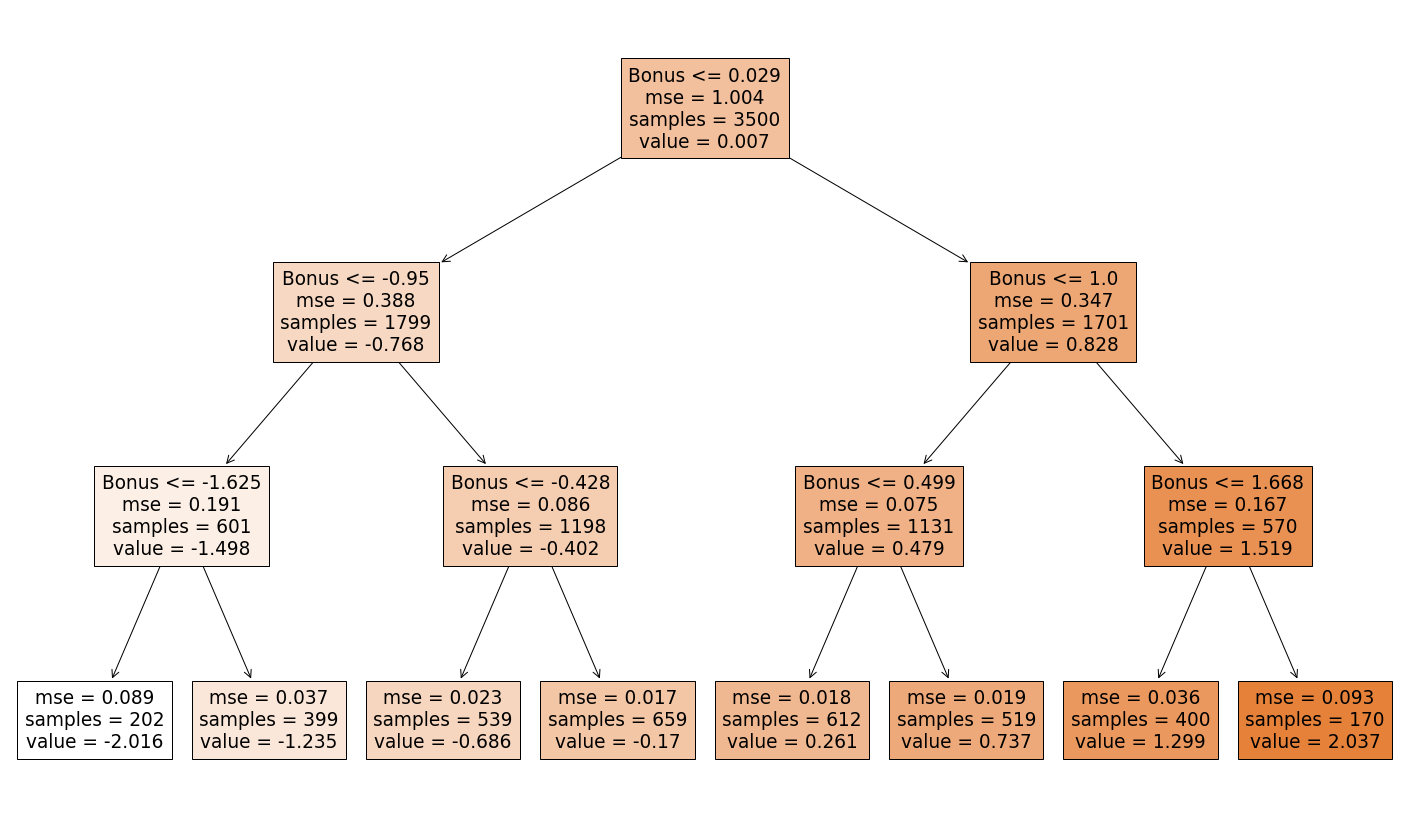

In [85]:
# Plotting decision tree
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtree,feature_names=features,filled=True)

Text(0, 0.5, 'Predicted values')

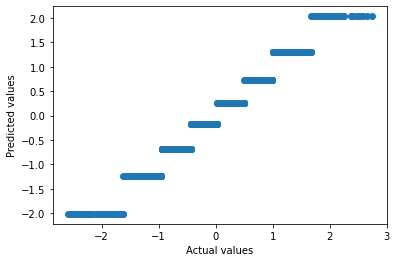

In [86]:
# Plot prediction with scatter plot
plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [87]:
# Add predictions, actuals and independent variables in single dataframe for better comparison.
df3=X_test[["Bonus","Months","Education"]]
df3["Actualvalue_Salary "]=y_test
df3["Predictedvalue_Salary"]=predictions
df3

,Bonus,Months,Education,Actualvalue_Salary,Predictedvalue_Salary
2764,0.129231,-0.575816,0.819046,0.129231,0.260957
4767,1.696927,1.575659,0.819046,1.696927,2.037181
3814,0.743534,0.601406,-1.230277,0.743534,0.736733
3499,0.557397,0.236061,0.819046,0.557397,0.736733
2735,0.113251,-0.575816,-1.230277,0.113251,0.260957
...,...,...,...,...,...
4140,0.958011,0.966751,0.819046,0.958011,0.736733
3969,0.834570,0.804376,-1.230277,0.834570,0.736733
2535,0.012097,-0.738191,0.819046,0.012097,-0.170153
1361,-0.661241,-1.265911,0.819046,-0.661241,-0.686353


## Now we check our model is effecient for other depth value

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [89]:
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [90]:
print(dtree.score(X_train,y_train)*100)
print(dtree.score(X_test,y_test)*100)

99.20457607164602
99.25292467440602


In [91]:
predictions = dtree.predict(X_test)
predictions

array([ 0.14547469,  1.86821657,  0.8523161 , ..., -0.0639844 ,
       -0.54236193, -0.54236193])

[Text(697.5, 733.86, 'Bonus <= 0.029\nmse = 1.004\nsamples = 3500\nvalue = 0.007'),
 Text(348.75, 570.78, 'Bonus <= -0.95\nmse = 0.388\nsamples = 1799\nvalue = -0.768'),
 Text(174.375, 407.70000000000005, 'Bonus <= -1.625\nmse = 0.191\nsamples = 601\nvalue = -1.498'),
 Text(87.1875, 244.62, 'Bonus <= -2.155\nmse = 0.089\nsamples = 202\nvalue = -2.016'),
 Text(43.59375, 81.54000000000008, 'mse = 0.037\nsamples = 53\nvalue = -2.436'),
 Text(130.78125, 81.54000000000008, 'mse = 0.023\nsamples = 149\nvalue = -1.867'),
 Text(261.5625, 244.62, 'Bonus <= -1.266\nmse = 0.037\nsamples = 399\nvalue = -1.235'),
 Text(217.96875, 81.54000000000008, 'mse = 0.01\nsamples = 163\nvalue = -1.437'),
 Text(305.15625, 81.54000000000008, 'mse = 0.008\nsamples = 236\nvalue = -1.096'),
 Text(523.125, 407.70000000000005, 'Bonus <= -0.428\nmse = 0.086\nsamples = 1198\nvalue = -0.402'),
 Text(435.9375, 244.62, 'Bonus <= -0.673\nmse = 0.023\nsamples = 539\nvalue = -0.686'),
 Text(392.34375, 81.54000000000008, 'ms

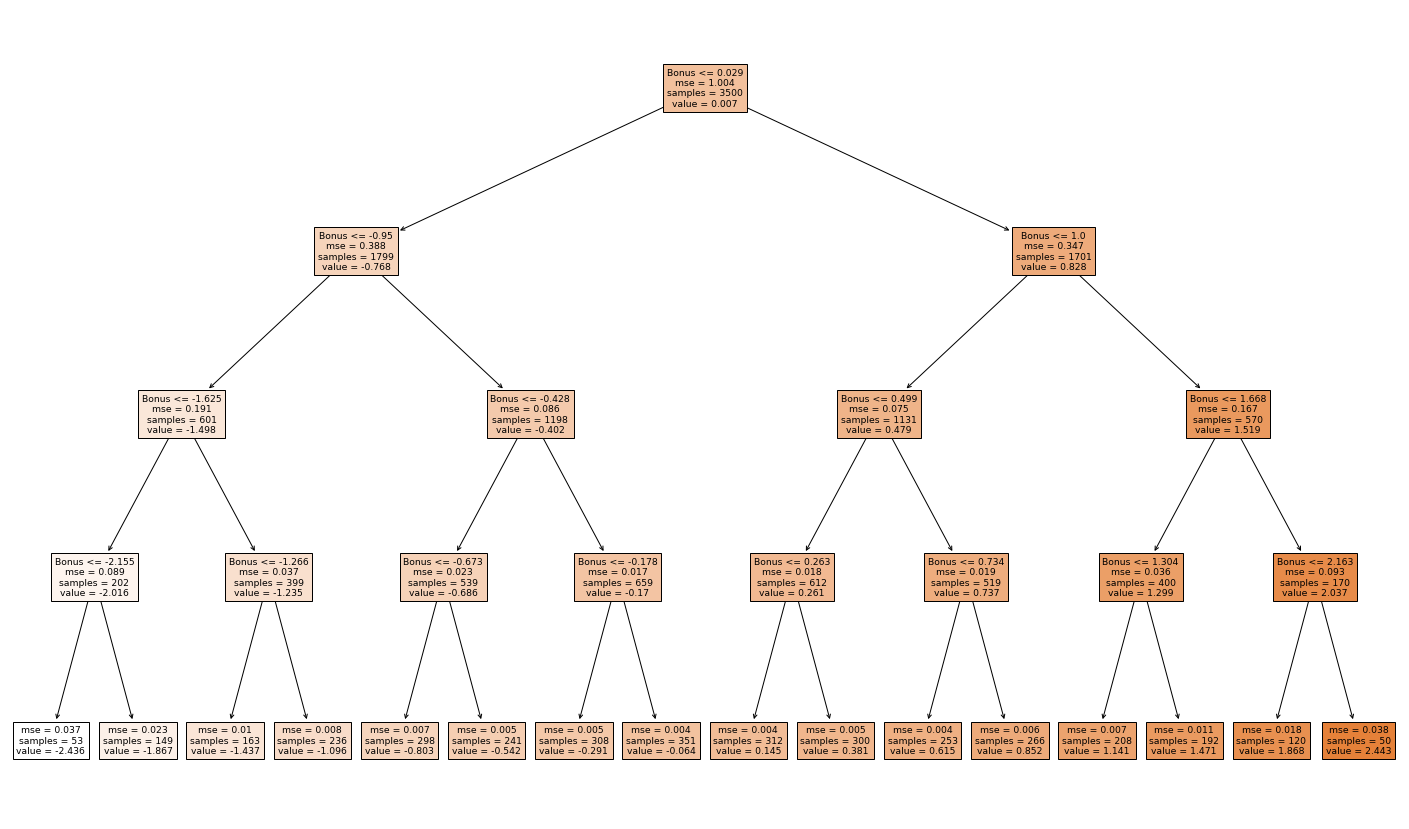

In [92]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtree,feature_names=features,filled=True)

Text(0, 0.5, 'Predicted values')

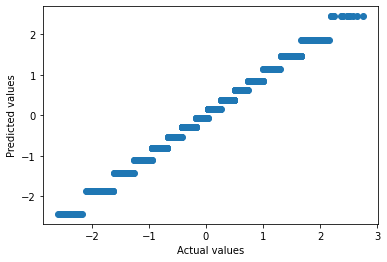

In [93]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [94]:
# Now we are checking if our model is well perform if we change max_depth value for range(4,10)
for i in range(4,10):
    dtree=DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    print("max_depth",i)
    print("Training score=",dtree.score(X_train,y_train)*100)
    print("Testing score=",dtree.score(X_test,y_test)*100)

max_depth 4
Training score= 99.20457607164602
Testing score= 99.25292467440602
max_depth 5
Training score= 99.8042227874103
Testing score= 99.78535806893038
max_depth 6
Training score= 99.95294924603274
Testing score= 99.94738379888346
max_depth 7
Training score= 99.98837365628896
Testing score= 99.98579290767266
max_depth 8
Training score= 99.99735241216663
Testing score= 99.9962446218056
max_depth 9
Training score= 99.99945130694005
Testing score= 99.9986926730305


### So for depth>3 we get 99% accuracy. But our features are only three if we go for deapth greater than 3 then our model was overfit . 

## Cross Validation

## Now we check different test value with depth =3 since it gives more accuracy.

In [95]:
from sklearn.model_selection import ShuffleSplit
model2=DecisionTreeRegressor(max_depth=3)

In [96]:
ssplit=ShuffleSplit(n_splits=10,test_size=20)

In [97]:
results=cross_val_score(model2,X,y,cv=ssplit)*100

In [98]:
print(results)

[97.08533454 95.04871706 97.31246234 96.23953015 97.64988483 96.05529552
 96.9571745  97.79749709 97.83205642 96.97178854]


## So for this depth=3 and test_size= 0.5 we get 96% accuracy prity similar with test_size=0.3.

## we get high accuracy in decision tree regressor model but we have to see if we can get better accuracy in different model , hence we perform our next random forest model.

# 3) Random Forest

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [100]:
# Importing RandomForestRegressor for model building
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=3)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=3)

In [101]:
predictions = RF.predict(X_test)
predictions

array([ 0.12833236,  1.69724617,  0.74389261, ...,  0.01189534,
       -0.66200683, -0.5911089 ])

In [102]:
# Getting accuracy for training and testing data
print(RF.score(X_train,y_train)*100)
print(RF.score(X_test,y_test)*100)

99.999774165469
99.99969391722345


### Here we get high accuracy 99.99% , we can say this model is well performing .

In [103]:
# Now we are checking if our model is well perform if we change n_estemator value for range(4,10)
from sklearn.ensemble import RandomForestRegressor
for i in range(4,10):
    RF=RandomForestRegressor(n_estimators=i)
    RF.fit(X_train,y_train)
    print("n.estimator",i)
    print("Training score=",RF.score(X_train,y_train))
    print("Testing score=",RF.score(X_test,y_test))

n.estimator 4
Training score= 0.9999981735584325
Testing score= 0.9999957307294102
n.estimator 5
Training score= 0.9999987682063617
Testing score= 0.9999963551243648
n.estimator 6
Training score= 0.9999987756541704
Testing score= 0.9999966260176018
n.estimator 7
Training score= 0.9999988928970992
Testing score= 0.9999968103434377
n.estimator 8
Training score= 0.9999990793397933
Testing score= 0.999997300424903
n.estimator 9
Training score= 0.9999992247707211
Testing score= 0.9999967613537071


Text(0, 0.5, 'Predicted values')

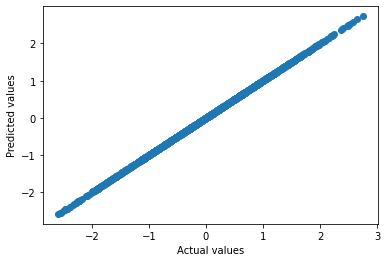

In [104]:
# Plot prediction with scatter plot
plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [105]:
# Add predictions, actuals and independent variables in single dataframe for better comparison.
df4=X_test[["Bonus","Months","Education"]]
df4["Actualvalue_Salary "]=y_test
df4["Predictedvalue_Salary"]=predictions
df4

,Bonus,Months,Education,Actualvalue_Salary,Predictedvalue_Salary
2764,0.129231,-0.575816,0.819046,0.129231,0.128332
4767,1.696927,1.575659,0.819046,1.696927,1.697246
3814,0.743534,0.601406,-1.230277,0.743534,0.743893
3499,0.557397,0.236061,0.819046,0.557397,0.557545
2735,0.113251,-0.575816,-1.230277,0.113251,0.113677
...,...,...,...,...,...
4140,0.958011,0.966751,0.819046,0.958011,0.957963
3969,0.834570,0.804376,-1.230277,0.834570,0.834536
2535,0.012097,-0.738191,0.819046,0.012097,0.011895
1361,-0.661241,-1.265911,0.819046,-0.661241,-0.662007


## Cross validation

## Now we cross check this model is this well performing or not. So we change test size of model.

In [106]:
model3=RandomForestRegressor(n_estimators=3)

In [107]:
ssplit=ShuffleSplit(n_splits=10,test_size=20)

In [108]:
results=cross_val_score(model3,X,y,cv=ssplit)

In [109]:
print(results)

[0.99999937 0.99998788 0.99999851 0.99999822 0.9999989  0.99999927
 0.9999993  0.99999691 0.99999937 0.99998135]


# Now this model is of high accuracy and it also gives same accuracy for all estimator values and also if we change test size it also work well ,so we can say Random forest or linear regression both are great for this data linear gives 100% accuracy so it may be over fitted for our data so we choose random forest .